<ipython-input-2-c4afca359b5d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.replace({'Yes': 1, 'No': 0}, inplace=True)


Top 10 Features:
               Feature  Importance
6        policy_tenure    0.793044
7           age_of_car    0.106746
9   population_density    0.095300
11        displacement    0.000653
15        gross_weight    0.000550
14      turning_radius    0.000522
0          ncap_rating    0.000333
8          ncap_rating    0.000328
12            cylinder    0.000265
5    is_parking_camera    0.000242


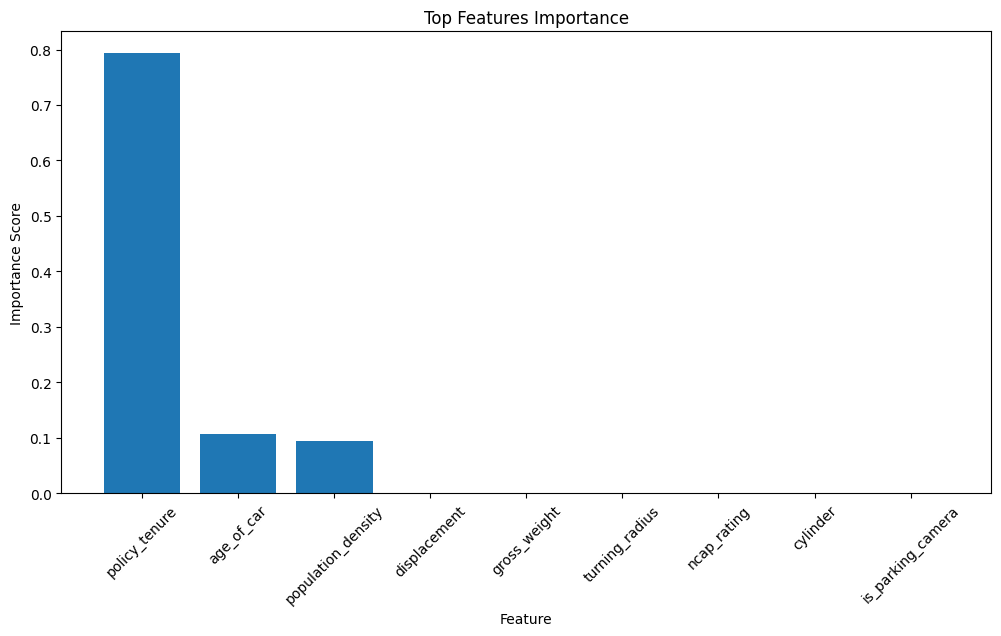

In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt

# 讀取數據
features_file_path = 'train.csv'  # 替換為你的數據集文件路徑
data_feature = pd.read_csv(features_file_path)
selected_features = data_feature[['ncap_rating','is_esc','is_adjustable_steering','is_tpms','is_parking_sensors','is_parking_camera','policy_tenure', 'age_of_car', 'ncap_rating', 'population_density', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']]
selected_features.replace({'Yes': 1, 'No': 0}, inplace=True)
# 選擇特徵和目標變量
X = selected_features
y = data_feature['is_claim']

# 初始化隨機森林模型
rf_model = RandomForestClassifier(n_estimators=200, random_state=42)

# 訓練模型
rf_model.fit(X, y)

# 獲取特徵重要性分數
feature_importances = rf_model.feature_importances_

# 將特徵名稱和其重要性分數結合
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# 按重要性降序排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 顯示前幾個重要的特徵
top_features = 10  # 設定你想顯示的前幾個特徵數量
print(f'Top {top_features} Features:')
print(feature_importance_df.head(top_features))

# 繪製特徵重要性圖
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'][:top_features], feature_importance_df['Importance'][:top_features])
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top Features Importance')
plt.xticks(rotation=45)
plt.show()


<ipython-input-3-f91955ae5714>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.replace({'Yes': 1, 'No': 0}, inplace=True)


Top 10 Features:
                          Feature  Importance
6                   policy_tenure    0.533591
7                      age_of_car    0.248737
11                   displacement    0.079881
15                   gross_weight    0.063735
9              population_density    0.040226
12                       cylinder    0.017698
25  is_day_night_rear_view_mirror    0.004234
22             is_central_locking    0.002802
27                 is_speed_alert    0.002117
14                 turning_radius    0.001511


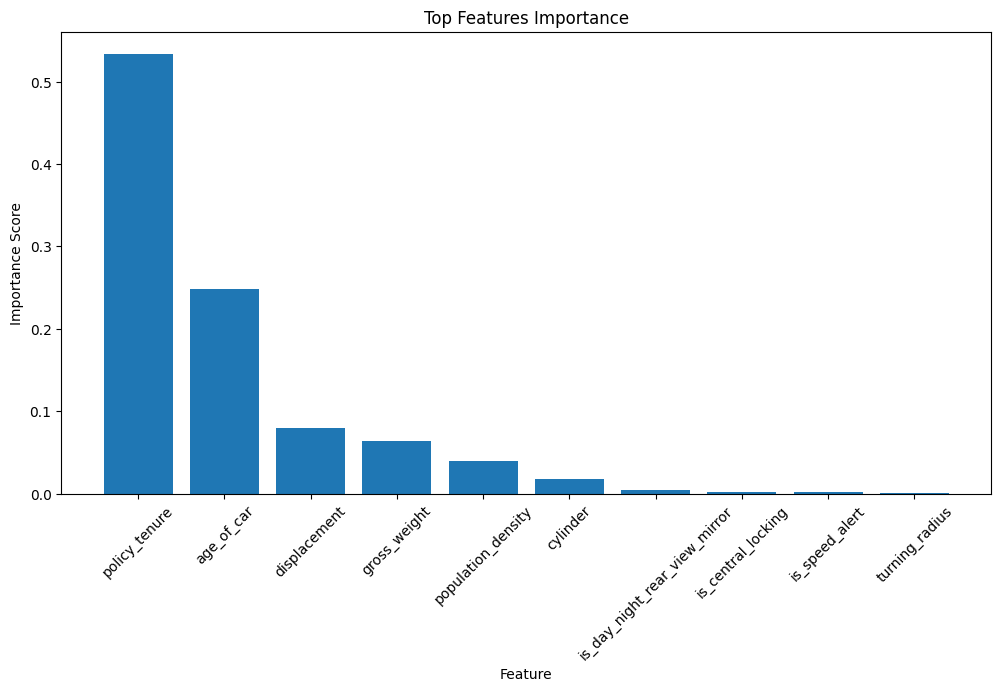

In [3]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt

# 讀取數據
features_file_path = 'train.csv'  # 替換為你的數據集文件路徑
data_feature = pd.read_csv(features_file_path)
selected_features = data_feature[['ncap_rating','is_esc','is_adjustable_steering','is_tpms','is_parking_sensors','is_parking_camera','policy_tenure', 'age_of_car', 'ncap_rating', 'population_density', 'airbags', 'displacement', 'cylinder', 'gear_box', 'turning_radius', 'gross_weight', 'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks', 'is_central_locking', 'is_power_steering', 'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror', 'is_ecw', 'is_speed_alert']]
selected_features.replace({'Yes': 1, 'No': 0}, inplace=True)
# 選擇特徵和目標變量
X = selected_features
y = data_feature['is_claim']

# 初始化梯度提升分类器
gb_model = GradientBoostingClassifier()

# 訓練模型
gb_model.fit(X, y)

# 獲取特徵重要性分數
feature_importances = gb_model.feature_importances_

# 將特徵名稱和其重要性分數結合
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# 按重要性降序排序
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 顯示前幾個重要的特徵
top_features = 10  # 設定你想顯示的前幾個特徵數量
print(f'Top {top_features} Features:')
print(feature_importance_df.head(top_features))

# 繪製特徵重要性圖
plt.figure(figsize=(12, 6))
plt.bar(feature_importance_df['Feature'][:top_features], feature_importance_df['Importance'][:top_features])
plt.xlabel('Feature')
plt.ylabel('Importance Score')
plt.title('Top Features Importance')
plt.xticks(rotation=45)
plt.show()


In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from imblearn.over_sampling import RandomOverSampler

# Read your feature data and labels
features_file_path = 'train.csv'
all_features = pd.read_csv(features_file_path)
selected_features = all_features[['policy_tenure', 'age_of_car','population_density']]  # Adjust based on your features
selected_features.replace({'Yes': 1, 'No': 0}, inplace=True)

# Assuming the last column is the target variable (label)
X = selected_features
y = all_features.iloc[:, -1]

# Handle class imbalance using oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Combine features and labels into a TensorDataset
X_train_tensor, y_train_tensor = torch.Tensor(X_train.values), torch.Tensor(y_train.values)
X_test_tensor, y_test_tensor = torch.Tensor(X_test.values), torch.Tensor(y_test.values)

# Define a simple 2-layer MLP
class MLP(nn.Module):
    def __init__(self, input_size):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 100)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(100, 1)
        self.sigmoid = nn.Sigmoid()

        self.fc = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        # x = self.fc1(x)
        # x = self.relu(x)
        # x = self.fc2(x)
        # x = self.sigmoid(x)
        x = self.fc(x)
        return x

# Define the Deep Random Forest model
class DeepRandomForest(nn.Module):
    def __init__(self, input_size, num_models):
        super(DeepRandomForest, self).__init__()
        self.models = nn.ModuleList([MLP(input_size) for _ in range(num_models)])

    def forward(self, x):
        outputs = [model(x) for model in self.models]
        return torch.mean(torch.stack(outputs), dim=0)

# Combine features and labels into a TensorDataset
train_dataset = TensorDataset(torch.Tensor(X_train.values), torch.Tensor(y_train.values))
test_dataset = TensorDataset(torch.Tensor(X_test.values), torch.Tensor(y_test.values))

# Create DataLoader for training and test
train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Initialize the Deep Random Forest model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = X_train.shape[1]  # Adjust according to your input size
num_models =  2 # Number of MLPs in the ensemble
deep_random_forest = DeepRandomForest(input_size, num_models).to(device)

# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(deep_random_forest.parameters(), lr=0.001, weight_decay=1e-3)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = deep_random_forest(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {loss.item()}')


# Evaluate the deep_random_forest model on the test set
deep_random_forest.train()
with torch.no_grad():
    all_predictions = []
    all_labels = []
    for inputs, labels in test_loader:
        outputs = deep_random_forest(inputs)
        predicted = (outputs >= 0.5).int()
        all_predictions.extend(np.squeeze(predicted.cpu().numpy()))
        all_labels.extend(np.squeeze(labels.cpu().numpy().astype(int)))

# Save the trained model state
torch.save(deep_random_forest.state_dict(), 'trained_model.pth')

# Convert the list to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)

# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)
conf_matrix = confusion_matrix(all_labels, all_predictions)

print("Ensemble Model Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


# Load test feature data
test_features_file_path = 'test.csv'
test_features = pd.read_csv(test_features_file_path)
selected_test_features = test_features[['policy_tenure', 'age_of_car','population_density']]


selected_test_features_tensor = torch.Tensor(selected_test_features.values).to(device)

# Load test label data (if available)
# Note: If you don't have the ground truth labels for the test set, you won't be able to calculate metrics like accuracy.
# In such cases, you may only use the model for prediction.
test_labels_file_path = 'sample_submission.csv'  # Adjust based on your file path
test_labels = pd.read_csv(test_labels_file_path)['is_claim']  # Adjust based on your label column name if applicable
test_labels_tensor = torch.Tensor(test_labels.values).to(device)


# Load the trained model state
deep_random_forest = DeepRandomForest(input_size, num_models).to(device)
deep_random_forest.load_state_dict(torch.load('trained_model.pth'))
deep_random_forest.eval()

# Use the trained deep_random_forest model to make predictions on the test set
with torch.no_grad():
    test_predictions = deep_random_forest(selected_test_features_tensor)
    test_predictions = (test_predictions >= 0.5).int().cpu().numpy()

test_labels_array = test_labels.values

# 如果 'test_labels_tensor' 在 locals() 中，計算評估指標
if 'test_labels_tensor' in locals():
    accuracy = accuracy_score(test_labels_array, test_predictions)
    precision = precision_score(test_labels_array, test_predictions)
    recall = recall_score(test_labels_array, test_predictions)
    f1 = f1_score(test_labels_array, test_predictions)
    conf_matrix = confusion_matrix(test_labels_array, test_predictions)

    print("Test Set Results:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print("Confusion Matrix:")
    print(conf_matrix)
else:
    print("Prediction results only, ground truth labels not available.")


<ipython-input-8-6be9082be0fe>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.replace({'Yes': 1, 'No': 0}, inplace=True)


Epoch 1/100, Loss: 0.6883962750434875
Epoch 2/100, Loss: 0.6918665170669556
Epoch 3/100, Loss: 0.6906967759132385
Epoch 4/100, Loss: 0.6977723836898804
Epoch 5/100, Loss: 0.6899532675743103
Epoch 6/100, Loss: 0.6951131820678711
Epoch 7/100, Loss: 0.6951068043708801
Epoch 8/100, Loss: 0.701107919216156
Epoch 9/100, Loss: 0.6932273507118225
Epoch 10/100, Loss: 0.6986731886863708
Epoch 11/100, Loss: 0.7029848098754883
Epoch 12/100, Loss: 0.6869286298751831
Epoch 13/100, Loss: 0.6972644329071045
Epoch 14/100, Loss: 0.6893723607063293
Epoch 15/100, Loss: 0.6942435503005981
Epoch 16/100, Loss: 0.6928700804710388
Epoch 17/100, Loss: 0.6958263516426086
Epoch 18/100, Loss: 0.6975827813148499
Epoch 19/100, Loss: 0.6941381692886353
Epoch 20/100, Loss: 0.6881782412528992
Epoch 21/100, Loss: 0.6935495734214783
Epoch 22/100, Loss: 0.6910755634307861
Epoch 23/100, Loss: 0.6927395462989807
Epoch 24/100, Loss: 0.6923222541809082
Epoch 25/100, Loss: 0.6880010366439819
Epoch 26/100, Loss: 0.6945490837097

In [6]:
import torch
import torch.nn as nn
import torch.nn.init as init
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from imblearn.over_sampling import RandomOverSampler


# Read your feature data and labels
features_file_path = 'train.csv'
all_features = pd.read_csv(features_file_path)
selected_features = all_features[['policy_tenure', 'age_of_car','population_density']]
selected_features.replace({'Yes': 1, 'No': 0}, inplace=True)


# Assuming the last column is the target variable (label)
X = selected_features
y = all_features.iloc[:, -1]


# Handle class imbalance using oversampling
oversampler = RandomOverSampler(random_state=42)
X_resampled, y_resampled = oversampler.fit_resample(X, y)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)


# Combine features and labels into a TensorDataset
X_train_tensor, y_train_tensor = torch.Tensor(X_train.values), torch.Tensor(y_train.values)
X_test_tensor, y_test_tensor = torch.Tensor(X_test.values), torch.Tensor(y_test.values)


# Define the MLP model
class MLP(nn.Module):
    def __init__(self, input_size, weight_std=0.01):
        super(MLP, self).__init__()
        init_func = lambda x: init.normal_(x, mean=0, std=weight_std)

        self.fc1 = nn.Linear(input_size, 128)
        self.bn1 = nn.BatchNorm1d(128)

        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 256)
        self.bn2 = nn.BatchNorm1d(256)
        self.sigmoid = nn.Sigmoid()

        self.fc = nn.Sequential(
            nn.Linear(256, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Linear(256, 1),
            nn.Sigmoid()
        )

        # Batch Normalization 在輸出層前
        self.bn_final = nn.BatchNorm1d(1)

        # 每一層權重初始化
        init_func(self.fc1.weight)
        init_func(self.fc2.weight)
        for layer in self.fc:
            if isinstance(layer, nn.Linear):
                init_func(layer.weight)

    def forward(self, x):
        x = self.fc1(x)
        x = self.bn1(x)
        x = self.relu(x)

        x = self.fc2(x)
        x = self.bn2(x)
        x = self.sigmoid(x)

        x_final = self.fc(x.view(-1, 256))
        x_final = self.bn_final(x_final)
        x_final = self.sigmoid(x_final)

        return x_final


# Define the Deep Random Forest model
class DeepRandomForest(nn.Module):
    def __init__(self, input_size, num_models):
        super(DeepRandomForest, self).__init__()
        self.models = nn.ModuleList([MLP(input_size) for _ in range(num_models)])

    def forward(self, x):
        outputs = [model(x) for model in self.models]
        return torch.mean(torch.stack(outputs), dim=0)


# Combine features and labels into a TensorDataset
train_dataset = TensorDataset(torch.Tensor(X_train.values), torch.Tensor(y_train.values))
test_dataset = TensorDataset(torch.Tensor(X_test.values), torch.Tensor(y_test.values))


# Create DataLoader for training and test
train_loader = DataLoader(train_dataset, batch_size=256, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=256, shuffle=False)


# Initialize the Deep Random Forest model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
input_size = X_train.shape[1]  # Adjust according to your input size
num_models = 2 # Number of MLPs in the ensemble
deep_random_forest = DeepRandomForest(input_size, num_models).to(device)
model = MLP(input_size).to(device)


# Define loss function and optimizer
criterion = nn.BCELoss()
optimizer = optim.SGD(deep_random_forest.parameters(), lr=0.001, weight_decay=1e-3)


# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    total_loss = 0.0
    correct_predictions = 0
    total_samples = 0

    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = deep_random_forest(inputs)
        #outputs = model(inputs)
        loss = criterion(outputs, labels.unsqueeze(1))
        loss.backward()
        optimizer.step()

        # Calculate accuracy
        predictions = (outputs >= 0.3).int()
        correct_predictions += torch.sum(predictions == labels.unsqueeze(1)).item()
        total_samples += labels.size(0)

        total_loss += loss.item()

    average_loss = total_loss / len(train_loader)
    accuracy = correct_predictions / total_samples

    print(f'Epoch {epoch + 1}/{num_epochs}, Loss: {average_loss:.4f}, Accuracy: {accuracy:.4f}')


# Evaluate the deep_random_forest model on the test set
deep_random_forest.train()
with torch.no_grad():
    all_predictions = []
    all_labels = []
    for inputs, labels in test_loader:
        outputs = deep_random_forest(inputs)
        predicted = (outputs >= 0.5).int()
        all_predictions.extend(np.squeeze(predicted.cpu().numpy()))
        all_labels.extend(np.squeeze(labels.cpu().numpy().astype(int)))


# Save the trained model state
torch.save(deep_random_forest.state_dict(), 'trained_model.pth')


# Convert the list to numpy arrays
all_predictions = np.array(all_predictions)
all_labels = np.array(all_labels)


# Calculate evaluation metrics
accuracy = accuracy_score(all_labels, all_predictions)
precision = precision_score(all_labels, all_predictions)
recall = recall_score(all_labels, all_predictions)
f1 = f1_score(all_labels, all_predictions)
conf_matrix = confusion_matrix(all_labels, all_predictions)

print("Ensemble Model Evaluation Metrics:")
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


# Load test feature data
test_features_file_path = 'test.csv'
test_features = pd.read_csv(test_features_file_path)
selected_test_features = test_features[['policy_tenure', 'age_of_car','population_density']]
selected_test_features_tensor = torch.Tensor(selected_test_features.values).to(device)


# Load test label data (if available)
# Note: If you don't have the ground truth labels for the test set, you won't be able to calculate metrics like accuracy.
# In such cases, you may only use the model for prediction.
test_labels_file_path = 'sample_submission.csv'
test_labels = pd.read_csv(test_labels_file_path)['is_claim']  # Adjust based on your label column name if applicable
test_labels_tensor = torch.Tensor(test_labels.values).to(device)


# Load the trained model state
deep_random_forest = DeepRandomForest(input_size, num_models).to(device)
deep_random_forest.load_state_dict(torch.load('trained_model.pth'))
deep_random_forest.eval()


# Define the loss function
criterion = nn.BCELoss()


# Use the trained deep_random_forest model to make predictions on the test set
with torch.no_grad():
    # Assuming selected_test_features_tensor is your test input tensor
    test_predictions = deep_random_forest(selected_test_features_tensor)
    # Assuming test_labels_tensor is your test labels tensor
    loss = criterion(test_predictions, test_labels_tensor.unsqueeze(1))
    # Convert predictions to numpy array
    test_predictions = (test_predictions >= 0.5).int().cpu().numpy()


# Display the loss value
print(f"Test Loss: {loss.item()}")
test_labels_array = test_labels.values


# 如果 'test_labels_tensor' 在 locals() 中，計算評估指標
if 'test_labels_tensor' in locals():
    accuracy = accuracy_score(test_labels_array, test_predictions)
    precision = precision_score(test_labels_array, test_predictions)
    recall = recall_score(test_labels_array, test_predictions)
    f1 = f1_score(test_labels_array, test_predictions)
    conf_matrix = confusion_matrix(test_labels_array, test_predictions)

    print("Test Set Results:")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-Score: {f1}")
    print("Confusion Matrix:")
    print(conf_matrix)
else:
    print("Prediction results only, ground truth labels not available.")


<ipython-input-6-4aff03b6981b>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_features.replace({'Yes': 1, 'No': 0}, inplace=True)


Epoch 1/10, Loss: 0.6924, Accuracy: 0.5015
Epoch 2/10, Loss: 0.6916, Accuracy: 0.5014
Epoch 3/10, Loss: 0.6915, Accuracy: 0.5014
Epoch 4/10, Loss: 0.6916, Accuracy: 0.5014
Epoch 5/10, Loss: 0.6915, Accuracy: 0.5014
Epoch 6/10, Loss: 0.6913, Accuracy: 0.5015
Epoch 7/10, Loss: 0.6913, Accuracy: 0.5015
Epoch 8/10, Loss: 0.6913, Accuracy: 0.5014
Epoch 9/10, Loss: 0.6913, Accuracy: 0.5014
Epoch 10/10, Loss: 0.6912, Accuracy: 0.5014
Ensemble Model Evaluation Metrics:
Accuracy: 0.5298568693591029
Precision: 0.5250943396226415
Recall: 0.513184584178499
F1-Score: 0.5190711554602256
Confusion Matrix:
[[6058 5034]
 [5280 5566]]
Test Loss: 0.695451021194458
Test Set Results:
Accuracy: 0.46826920615416123
Precision: 1.0
Recall: 0.46826920615416123
F1-Score: 0.6378519745445036
Confusion Matrix:
[[    0     0]
 [20771 18292]]
